# Project 2 #

Everyone has to do part 1 and then you pick one of themes 1 and 2.

#### Data set ####
For this project you will use the TCGA data from the last project as well as the Cats and Dogs data set: 99 images of Cats and 99 images of Dogs. Each image is 64 by 64 pixels so it's pretty low resolution. The data set is of dimension 198 by 4096 (64 times 64), i.e. raster scans of the images. Label 0 denotes a cat and Label 1 a dog. The csv files containing the images and labels are on Canvas.
Here are 4 examples:

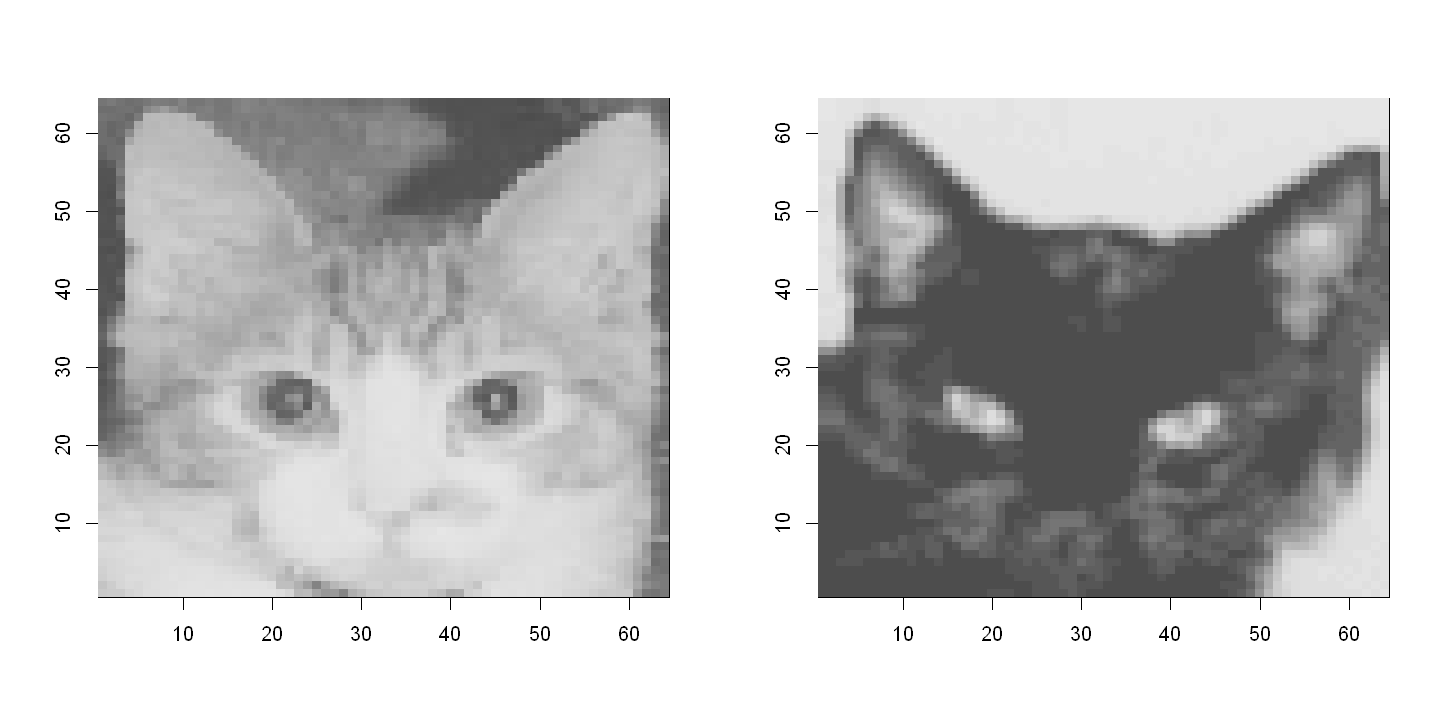

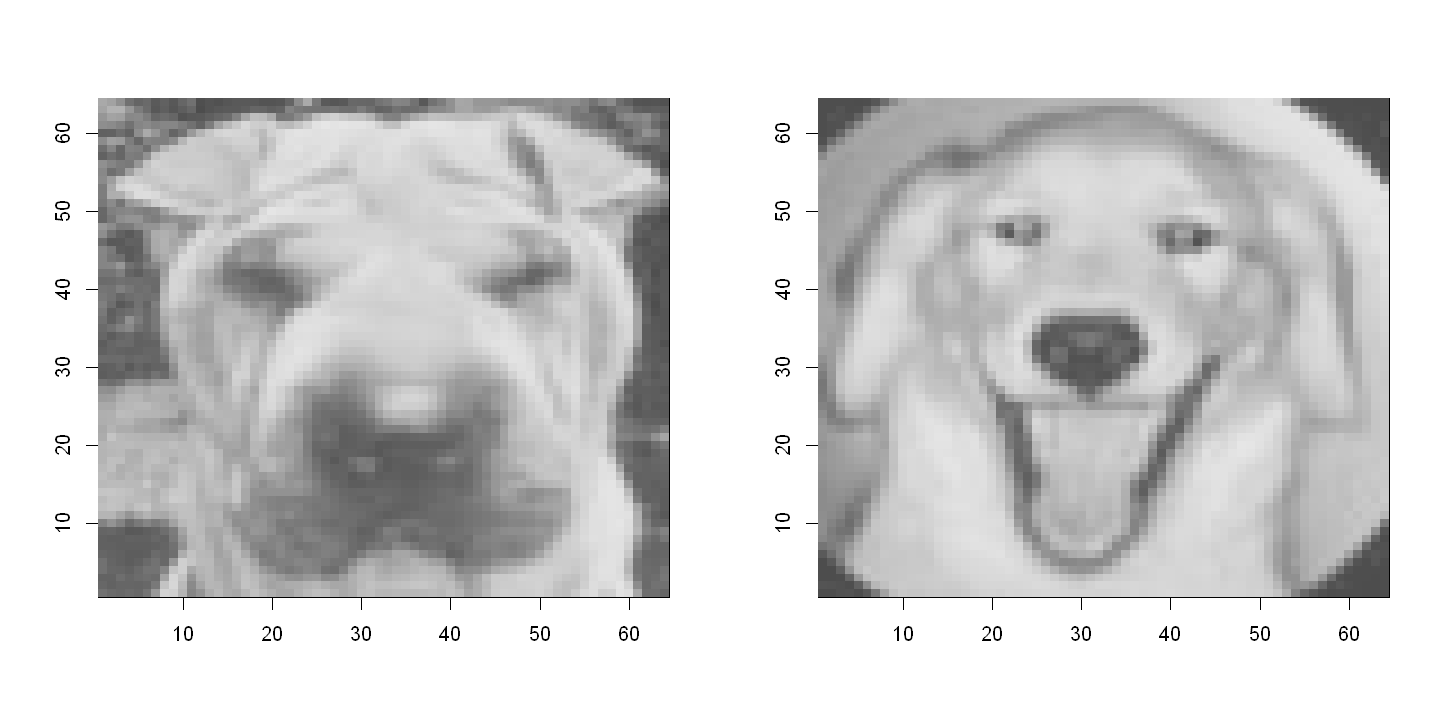

In [1]:
CATSnDOGS <- as.matrix(read.csv("CATSnDOGS.csv"))
Labels <- as.matrix(read.csv("Labels.csv"))
#
rotateM <- function(x) t(apply(x, 2, rev)) # the images are raster scans. Here, I just resort them for the
                                           # default image command in R to plot them with the right orientation.
#
library(repr)
options(repr.plot.width=12, repr.plot.height=6)
#
set.seed(1000012)
ssc<-sample(seq(1,198)[Labels==0],2,replace=F)
ssd<-sample(seq(1,198)[Labels==1],2,replace=F)
par(mfrow=c(1,2))
image(seq(1,64),seq(1,64),rotateM(matrix(CATSnDOGS[ssc[1],],64,64)),col=gray.colors(256),xlab="",ylab="")
image(seq(1,64),seq(1,64),rotateM(matrix(CATSnDOGS[ssc[2],],64,64)),col=gray.colors(256),xlab="",ylab="")
image(seq(1,64),seq(1,64),rotateM(matrix(CATSnDOGS[ssd[1],],64,64)),col=gray.colors(256),xlab="",ylab="")
image(seq(1,64),seq(1,64),rotateM(matrix(CATSnDOGS[ssd[2],],64,64)),col=gray.colors(256),xlab="",ylab="")


For the project, we will treat pixel values as features, ignoring the fact that these are images. What I mean, you are not expected to use image analysis tools etc. You can use the spatial (co)localization of the pixels for interpretation of results or to guide your methods. Visualizing e.g. feature importance or selection or mislabeled observations etc can be done using image representations for example.

For this project you will explore *ensemble methods*; bagging and boosting. You can limit yourselves to RandomForest and Gradient Boosting but also explore variants thereof if you like.

We have talked about RandomForests in class and we will talk about boosting, Gradient Boosting Machines, in the upcoming lecture. These two methods approach ensemble learning in different ways. While with RF you build many, deep trees (low bias/high variance) learners and apply a majority decision based on this collection of trees, with GBMs you build a classifier by combining so-called *weak learners*. 

Boosting principle (more on this in the lectures):  
Your final model $f(x) = \sum_l \alpha_l h_l(x)$, where each $h_l(x)$ is a weak learner like a shallow tree, or perhaps a single predictor used. You learn the model components $h_l(x)$ sequentially. At each iteration, you try to improve upon the previous iteration by adding one more component to better predict the errors still get with the current model. GBM using the loss gradients of the individual observations as a measure of how far off the model currently is. 

Sketch: function $f(x)$ and loss $L=.5||y-f(x)||^2$ with loss gradients $\nabla_f L = -(y-f)$. If you want to learn the function $f$ with gradient descent you can start with $f(x)=0$ everywhere and then iterate the GD steps: 
$$f_{t+1} = f_t + \eta (y-f_t)$$ with learning rate $\eta$. (Try implementing this at home on a onedimensional data say like a sinus function say). Now of course, this formulation does not lend itself to prediction so in GBM we approximate $\nabla_f L$ at iteration t with a weak learner. 


### Question 1  ###
##### 1a #####
Explore bagging and boosting to classify the cancer data from last project. In order to make it a bit more challenges, add noise to the features and investigate how well the models hold up as a function of increasing noise (increasing class overlap).  Note - you should add noise to both the training and the test data. If you don't the train and test data will have different distributions.

Both RF and Boosting can give you variable importance measures for the features, either by perturbation of features, counting the number of models in the ensemble that includes the features, etc. In your presentation, make sure you state which measure you used. Do they important features overlap between the methods? Are roughly the same number of features important for the two methods? How is feature importance affected by the increasing noise?

##### 1b  #####
Repeat 1a for the cats and dogs data set. This is a much smaller data set so you will face different challenges. 

*Optional: To add noise to this data set, I suggest you set a subset of pixels to random values and increase the fraction of pixels that are noise features. *

Investigate the feature importance for this data set as well.



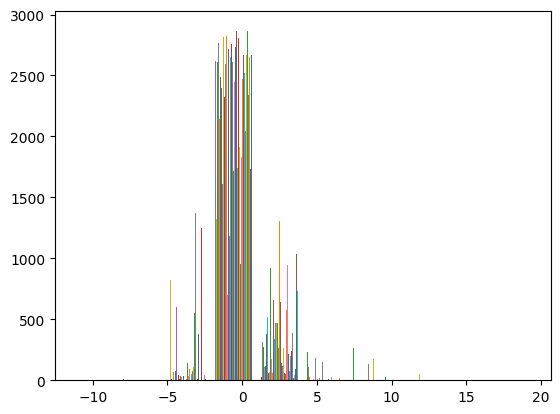

array([0.00022498, 0.        , 0.0278    , ..., 0.        , 0.00011563,
       0.        ])

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('data/TCGAdata.txt', sep=" " ,header=0)
labels_df = pd.read_csv('data/TCGAlabels', sep=" " ,header=0)

def test_split(data, labels, train_size):
    X_train, X_test, y_train, y_test = train_test_split(data, labels.values.ravel(), test_size=1-train_size)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = test_split(df, labels_df, 0.8)
rcf = RandomForestClassifier(n_estimators = 30)
rcf.fit(X_train, y_train)
1-rcf.score(X_test, y_test)

#plt.hist(df)
#plt.show()

rcf.feature_importances_

### Question 2 ###
In Question 2 you will try to "break" the methods - explore the number of trees, depth of trees etc, early stopping. You can choose to use the data sets above *or* you can simulate data to illustrate when the methods might struggle. This is very open ended on purpose so feel free to go crazy and we'll have a fun discussion!

##### Theme 1  #####
Groups with an odd number: RF

##### Theme 2 #####
Groups with an even number: Boosting

